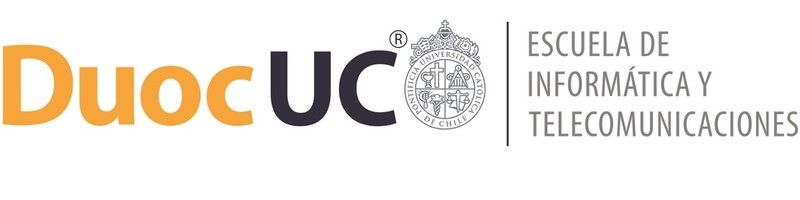

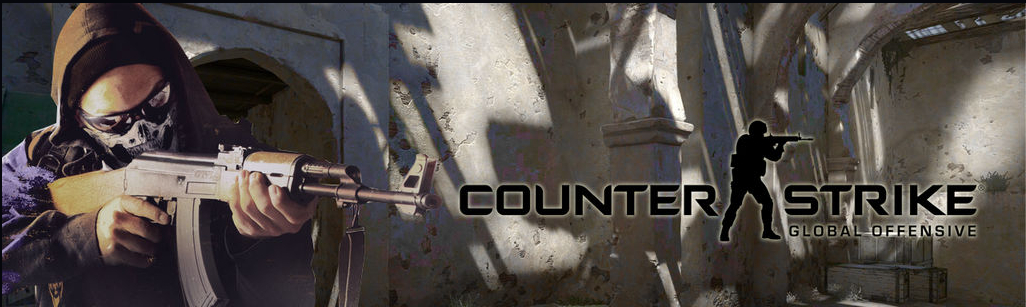

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes:
* Ignacio Retamales

Docente:     

Sección: MLY0100 -

# Caso Fundamentos de Machine Learning

CONTEXTO CASO

Valve, los ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan.


El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)  


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.  



En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

## Fase 1: Business Understanding

El siguiente analisis tiene relación con un data set referende al videojuego counter-strike global offensive lanzado en el año 2012 desarrollado por Valve Corporation y Hidden Path Entertainment

Este dataset se centra en el análisis del rendimiento en rondas de videojuegos. El objetivo es descubrir patrones y relaciones entre variables para preparar los datos para modelos de Machine Learning, como clasificación o regresión.

**Objetivos clave:**

*   Predecir el desempeño de jugadores en una ronda.

*   Detectar factores asociados a la victoria o derrota.

*   Explorar la influencia de variables en los resultados.

**Rol del Machine Learning:**

El Machine Learning optimiza aspectos cruciales en videojuegos como emparejamiento, detección de anomalías y análisis de rendimiento. Este análisis busca sentar las bases para investigaciones futuras, generando hipótesis e ideas para la construcción de modelos de Machine Learning robustos y efectivos.

En resumen, este estudio exploratorio del dataset nos permitirá comprender el rendimiento en rondas de videojuegos y aprovechar el poder del Machine Learning para mejorar la experiencia de juego.

La relevancia de este dataaset va en sus variables, tales como el tiempo, jugadores, resultados, entre otros. Mediante estos datos podremos realizar nuestro analisis y preparar el modelo para el uso que se le tenga que dar.

# Objetivos de regresión

Estos objetivos nos permitiran construir modelos útiles, evaluarlos con precisión y tomar decisiones estratégicas basadas en datos reales. Lo que nos interesa saber en cuanto a la regresion de los datos en esta oportunidad sera:

- Calcular el número esperado de headshots en una partida

- Predecir cuántas kills hará un jugador

- Predecir el tiempo que sobrevivirá un jugador

# Objetivos de categorización

Estos objetivos nos sirven para el análisis de comportamiento, estrategia y automatización de decisiones, nuestros objetivos de categorización seran los siguientes:

- Clasificar si un equipo será el ganador del match

- Clasificar si un jugador sobrevivirá la ronda

- Predecir qué equipo ganará una ronda

## Fase 2: Data Understanding

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score, RocCurveDisplay
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep=";", encoding='utf-8')

Saving Anexo ET_demo_round_traces_2022.csv to Anexo ET_demo_round_traces_2022.csv


/tmp/ipython-input-2-176206593.py:5: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(name, sep=";", encoding='utf-8')


In [ ]:
df.head()

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,...,0,0,0,0,1000,4400,0,0,0,0


In [ ]:
df.describe()

,Unnamed: 0,InternalTeamId,MatchId,RoundId,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
count,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,...,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000
mean,60570.193640,1.500006,250.525033,12.765517,0.498667,1.258057,0.675363,0.089840,0.005964,0.007046,...,0.671349,0.146178,0.301553,0.095633,3778.108695,18890.133532,8.511578,1.209912,1.874831,3.858484
std,36436.598386,0.500003,149.557804,7.432837,0.597985,1.184909,0.464125,0.279797,0.075497,0.082453,...,0.881798,0.385601,0.578843,0.320641,2111.285406,9743.203024,6.195079,1.435150,1.824027,3.246752
min,600.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30830.000000,1.000000,128.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1600.000000,10900.000000,3.000000,0.000000,0.000000,1.000000
50%,56720.000000,2.000000,236.000000,12.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4700.000000,22550.000000,8.000000,1.000000,1.000000,3.000000
75%,90639.000000,2.000000,373.000000,19.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,5200.000000,26050.000000,13.000000,2.000000,3.000000,6.000000
max,123779.000000,2.000000,511.000000,36.000000,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,5.000000,8850.000000,36150.000000,41.000000,11.000000,14.000000,22.000000


Con el siguiente codigo podremos observar el tipo de dato por columna para identificar que todo este correcto

In [ ]:
df_types = pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes
}).reset_index(drop=True)

df_types

,Column,Data Type
0,Unnamed: 0,int64
1,Map,object
2,Team,object
3,InternalTeamId,int64
4,MatchId,int64
5,RoundId,int64
6,RoundWinner,object
7,MatchWinner,object
8,Survived,bool
9,AbnormalMatch,bool


Como podemos observar, hay ciertas columnas que no tienen el tipo de dato especifico correcto, variables como TimeAlive, TravelledDistance, FirstKillTime están como texto, pero seguramente deberían ser numéricas, lo cual convertiremos ahora.

In [ ]:
df['TimeAlive'] = pd.to_numeric(df['TimeAlive'], errors='coerce')
df['TravelledDistance'] = pd.to_numeric(df['TravelledDistance'], errors='coerce')
df['FirstKillTime'] = pd.to_numeric(df['FirstKillTime'], errors='coerce')

Volvemos a visualizar los tipos de datos de cada columna.

In [ ]:
df_types = pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes
}).reset_index(drop=True)

df_types

,Column,Data Type
0,Unnamed: 0,int64
1,Map,object
2,Team,object
3,InternalTeamId,int64
4,MatchId,int64
5,RoundId,int64
6,RoundWinner,object
7,MatchWinner,object
8,Survived,bool
9,AbnormalMatch,bool


Podemos observar que ahora los tipos de datos de TimeAlive, TravelledDistance y FirstKillTime ahora son del tipo float64

A continuación se visualizan las medidas de tendencia central tales como la media, la mediana, la moda y por otro lado la desviación estandar, con estom, podremos analizar de mejor manera los datos entregados

In [ ]:
# Calculo de medidas estadisticas
estadisticas = df.describe()  # Obtiene un resumen estadístico general

# Agregar la moda
moda = df.mode().iloc[0]
estadisticas.loc['moda'] = moda

# Seleccionar las columnas de interés
estadisticas_df = estadisticas.loc[['mean', '50%', 'moda', 'std']]

# Renombrar las columnas
estadisticas_df = estadisticas_df.rename(
    index={'mean': 'Media', '50%': 'Mediana', 'std': 'Desviación estándar'}
)

# Mostrar tabla con formato visual
estadisticas_df.style.set_caption(
    "📊 Estadísticas Descriptivas (Tendencia central y dispersión)"
).format(precision=2)

,Unnamed: 0,InternalTeamId,MatchId,RoundId,TimeAlive,TravelledDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
Media,60570.19,1.50,250.53,12.77,281.34,1184.34,0.50,1.26,0.68,0.09,0.01,0.01,0.22,235.09,0.67,0.15,0.30,0.10,3778.11,18890.13,8.51,1.21,1.87,3.86
Mediana,56720.00,2.00,236.00,12.00,105.12,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4700.00,22550.00,8.00,1.00,1.00,3.00
moda,600.00,2.00,29.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4700.00,23500.00,2.00,0.00,0.00,1.00
Desviación estándar,36436.60,0.50,149.56,7.43,292.55,12337.14,0.60,1.18,0.46,0.28,0.08,0.08,0.42,330.19,0.88,0.39,0.58,0.32,2111.29,9743.20,6.20,1.44,1.82,3.25


Ahora realizaremos un analisis respecto a la relación que tienen la variable TeamStartingEquipmentValue y RoundWinner y nuestra hipotesis sera:

Los equipos con un mayor TeamStartingEquipmentValue tienen más probabilidad de ganar el RoundWinner

Valor esperado de headshots por partida: 3.86


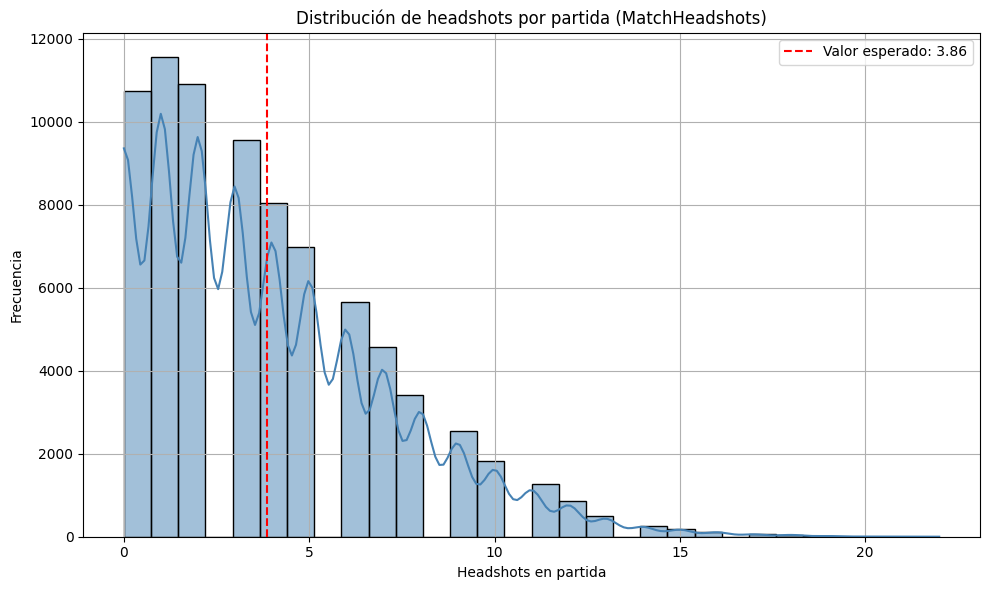

In [ ]:
# Nos aseguraremos de que la variable es de valor numerido
df['MatchHeadshots'] = pd.to_numeric(df['MatchHeadshots'], errors='coerce')

# Eliminamos las filas vacias
df_clean = df.dropna(subset=['MatchHeadshots'])

# Calcular el valor esperado (media)
expected_headshots = df_clean['MatchHeadshots'].mean()
print(f"Valor esperado de headshots por partida: {expected_headshots:.2f}")

# Graficar
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['MatchHeadshots'], bins=30, kde=True, color='steelblue')
plt.axvline(expected_headshots, color='red', linestyle='--', label=f'Valor esperado: {expected_headshots:.2f}')
plt.title('Distribución de headshots por partida (MatchHeadshots)')
plt.xlabel('Headshots en partida')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# **Conclusión de la hipotesis 1**

Lo que podemos observar en el grafico es que en promedio, los jugadores hacen alrededor de 4 headshots por partida y pocos jugadores superan los 10 headshots por partida.



A continuación, realizaremos un analisis entre las variables RoundWinner y RoundHeadshots, la principal hipotesis para este analsis sera de:

El número de RoundHeadshots se correlaciona positivamente con la probabilidad de ganar el round.

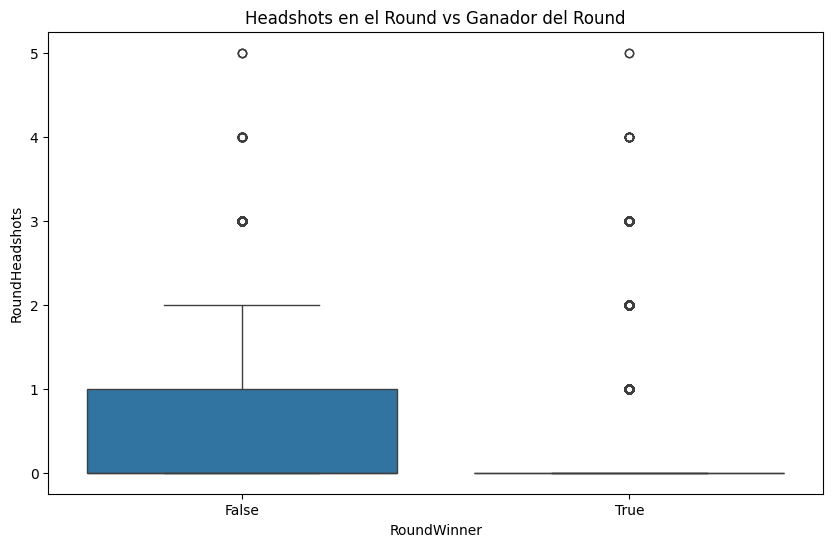

In [ ]:
plt.figure(figsize=(10,6))
sb.boxplot(data=df, x='RoundWinner', y='RoundHeadshots')
plt.title('Headshots en el Round vs Ganador del Round')
plt.show()

# **Conclusión de la hipotesis 2**

Contrario a lo esperado, el número de headshots por round es similar o incluso levemente mayor en los equipos que pierden. Esto sugiere que los headshots no son determinantes para ganar un round, y que podrían estar ocurriendo de forma aislada o sin un impacto táctico decisivo.

Es posible que los equipos que dependen de jugadas individuales como headshots no logren coordinarse de forma efectiva como equipo, lo que podría explicar por qué, aunque haya headshots, terminan perdiendo el round.

Por ultimo, realizaremos una tercera y ultima hipotesis respecto a las variables "MatchWinner" y "MatchKills", nuestra hipotesis sera la siguiente:

Un mayor número de MatchKills predice una mayor probabilidad de ganar el MatchWinner.

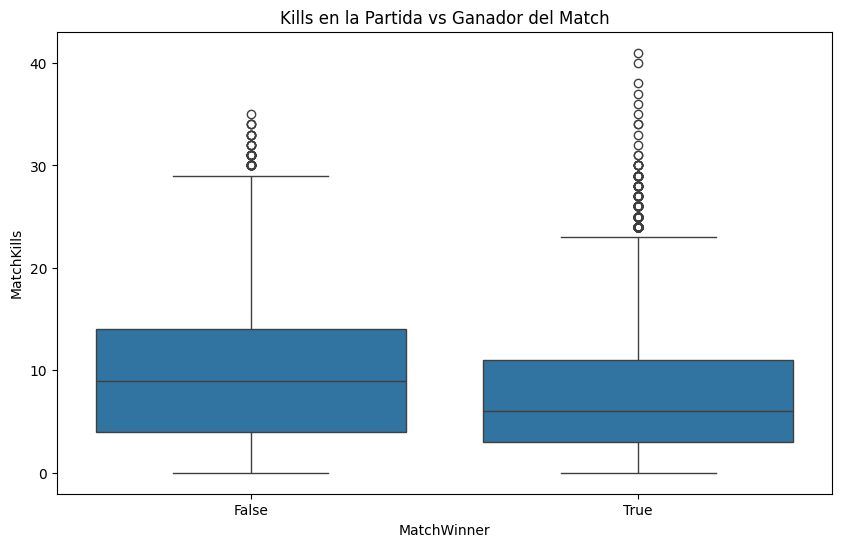

In [ ]:
plt.figure(figsize=(10,6))
sb.boxplot(data=df, x='MatchWinner', y='MatchKills')
plt.title('Kills en la Partida vs Ganador del Match')
plt.show()

# **Conclusión de la hipotesis 3**

Aunque se hipotetizó que un mayor número de kills individuales llevaría a una mayor probabilidad de victoria, los datos muestran que ganar depende de múltiples factores estratégicos, no únicamente de la cantidad de eliminaciones.

Además, hubo una presencia importante de outliers (jugadores con muchos kills) en ambos grupos, especialmente entre los ganadores.

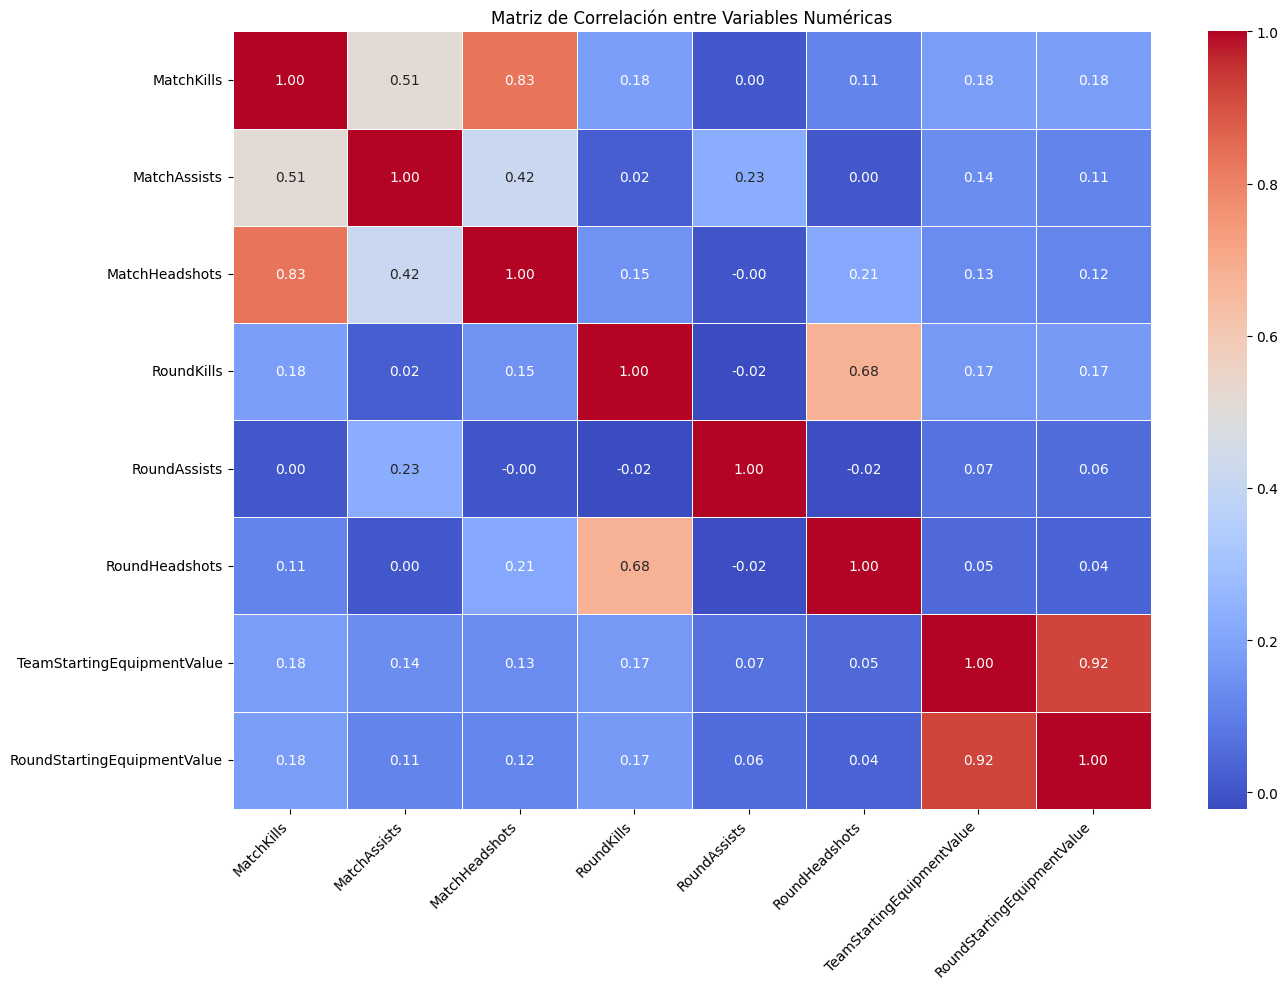

In [ ]:
# Calculamos la matriz de correlación
corr_matrix = df[['MatchKills', 'MatchAssists', 'MatchHeadshots', 'RoundKills', 'RoundAssists', 'RoundHeadshots', 'TeamStartingEquipmentValue','RoundStartingEquipmentValue']].corr()

# Visualizamos el heatmap
plt.figure(figsize=(14, 10))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Conclusión de la matriz de correlación**
Del análisis de correlaciones se concluye que el número de kills (MatchKills) de un jugador se encuentra fuertemente relacionado con la cantidad de disparos en la cabeza (MatchHeadshots), y en menor medida con las asistencias (MatchAssists).

Algunos ejemplos concretos son los siguientes:

- La correlación de la variable MatchHeadshots y Matchkills es que a mayor cantided de headshots mayor sera la cantidad de kills por partida

- La correlación de la variable RoundHeadshots y MatchKills es que la cantidad de bajas en el partido no necesariamente tiene relación con el numero de headshots realizados en una partida

- La correlación entre la variable RoundKills y RoundAssists es que a mayor numero de asistencias por round no significa mayor numero de killas

## Fase 3: Data Preparation

Haremos una corrección rapida de tdos los datos para tener preparado el dataset:

In [ ]:
# 1. Corregir valores anómalos
df['RoundWinner'] = df['RoundWinner'].replace('False4', 'False')
df['RoundWinner'] = df['RoundWinner'].map({'False': 0, 'True': 1})
print(df.dtypes)

print("✅ Datos preparados correctamente.")

Unnamed: 0                       int64
Map                             object
Team                            object
InternalTeamId                   int64
MatchId                          int64
RoundId                          int64
RoundWinner                    float64
MatchWinner                     object
Survived                          bool
AbnormalMatch                     bool
TimeAlive                       object
TravelledDistance               object
RLethalGrenadesThrown            int64
RNonLethalGrenadesThrown         int64
PrimaryAssaultRifle            float64
PrimarySniperRifle             float64
PrimaryHeavy                   float64
PrimarySMG                     float64
PrimaryPistol                    int64
FirstKillTime                   object
RoundKills                       int64
RoundAssists                     int64
RoundHeadshots                   int64
RoundFlankKills                  int64
RoundStartingEquipmentValue      int64
TeamStartingEquipmentValu

In [ ]:
# Verificar
print(df.isnull().sum())

Unnamed: 0                         0
Map                                0
Team                               2
InternalTeamId                     0
MatchId                            0
RoundId                            0
RoundWinner                    79157
MatchWinner                        1
Survived                           0
AbnormalMatch                      0
TimeAlive                          0
TravelledDistance                  0
RLethalGrenadesThrown              0
RNonLethalGrenadesThrown           0
PrimaryAssaultRifle                0
PrimarySniperRifle                 0
PrimaryHeavy                       0
PrimarySMG                         0
PrimaryPistol                      0
FirstKillTime                      0
RoundKills                         0
RoundAssists                       0
RoundHeadshots                     0
RoundFlankKills                    0
RoundStartingEquipmentValue        0
TeamStartingEquipmentValue         0
MatchKills                         0
M

In [ ]:
#Relizar copia y eliminar nulos
df_c = df.copy()
df_c = df_c.dropna(subset=['Team', 'MatchWinner'])
# Verificar
print(df_c.isnull().sum())

Unnamed: 0                         0
Map                                0
Team                               0
InternalTeamId                     0
MatchId                            0
RoundId                            0
RoundWinner                    79154
MatchWinner                        0
Survived                           0
AbnormalMatch                      0
TimeAlive                          0
TravelledDistance                  0
RLethalGrenadesThrown              0
RNonLethalGrenadesThrown           0
PrimaryAssaultRifle                0
PrimarySniperRifle                 0
PrimaryHeavy                       0
PrimarySMG                         0
PrimaryPistol                      0
FirstKillTime                      0
RoundKills                         0
RoundAssists                       0
RoundHeadshots                     0
RoundFlankKills                    0
RoundStartingEquipmentValue        0
TeamStartingEquipmentValue         0
MatchKills                         0
M

# **Corrección de valores anómalos:**

Se identificó un error en la variable RoundWinner ("False4"), el cual fue corregido, asegurando que todos los valores fueran coherentes (0 para ronda perdida, 1 para ronda ganada).

# **Manejo de datos nulos:**

Se revisaron todas las variables en busca de valores nulos (NaN).

Se eliminaron aquellas filas que contenían datos faltantes para mantener la integridad del análisis, dado que la cantidad de nulos era manejable.

# **Revisión y ajuste de tipos de datos:**

Se verificó que las variables claves tuvieran el tipo de dato adecuado (por ejemplo, RoundWinner y Survived como enteros), evitando errores en los futuros procesos de modelado o visualización.

Evaluación nro 4

In [ ]:
# Verificar nulos
print(df.isnull().sum())

# Eliminar filas con nulos
df = df.dropna()

# Revisión de tipos de datos
print(df.dtypes)

# Verificar clases únicas en la variable objetivo
print(df['MatchWinner'].value_counts())

Unnamed: 0                     0
Map                            0
Team                           2
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    1
Survived                       0
AbnormalMatch                  0
TimeAlive                      0
TravelledDistance              0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
FirstKillTime                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills                0
MatchAssists                   0
MatchHeadshots                 0
dtype: int

ROC AUC Score: 0.7365
Average Precision Score: 0.6488
Classification Report:
              precision    recall  f1-score   support

       False       0.75      0.75      0.75     12645
        True       0.72      0.72      0.72     11102

    accuracy                           0.74     23747
   macro avg       0.74      0.74      0.74     23747
weighted avg       0.74      0.74      0.74     23747



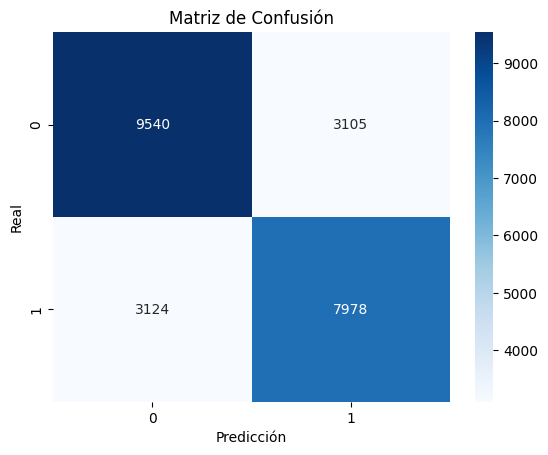

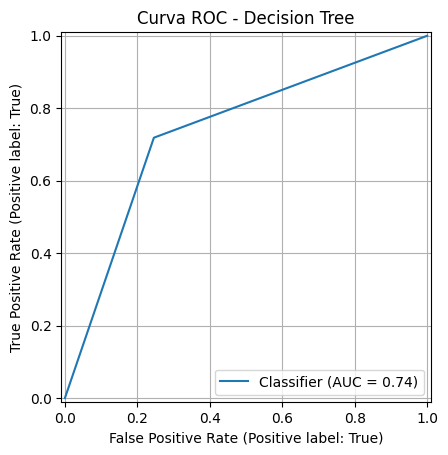

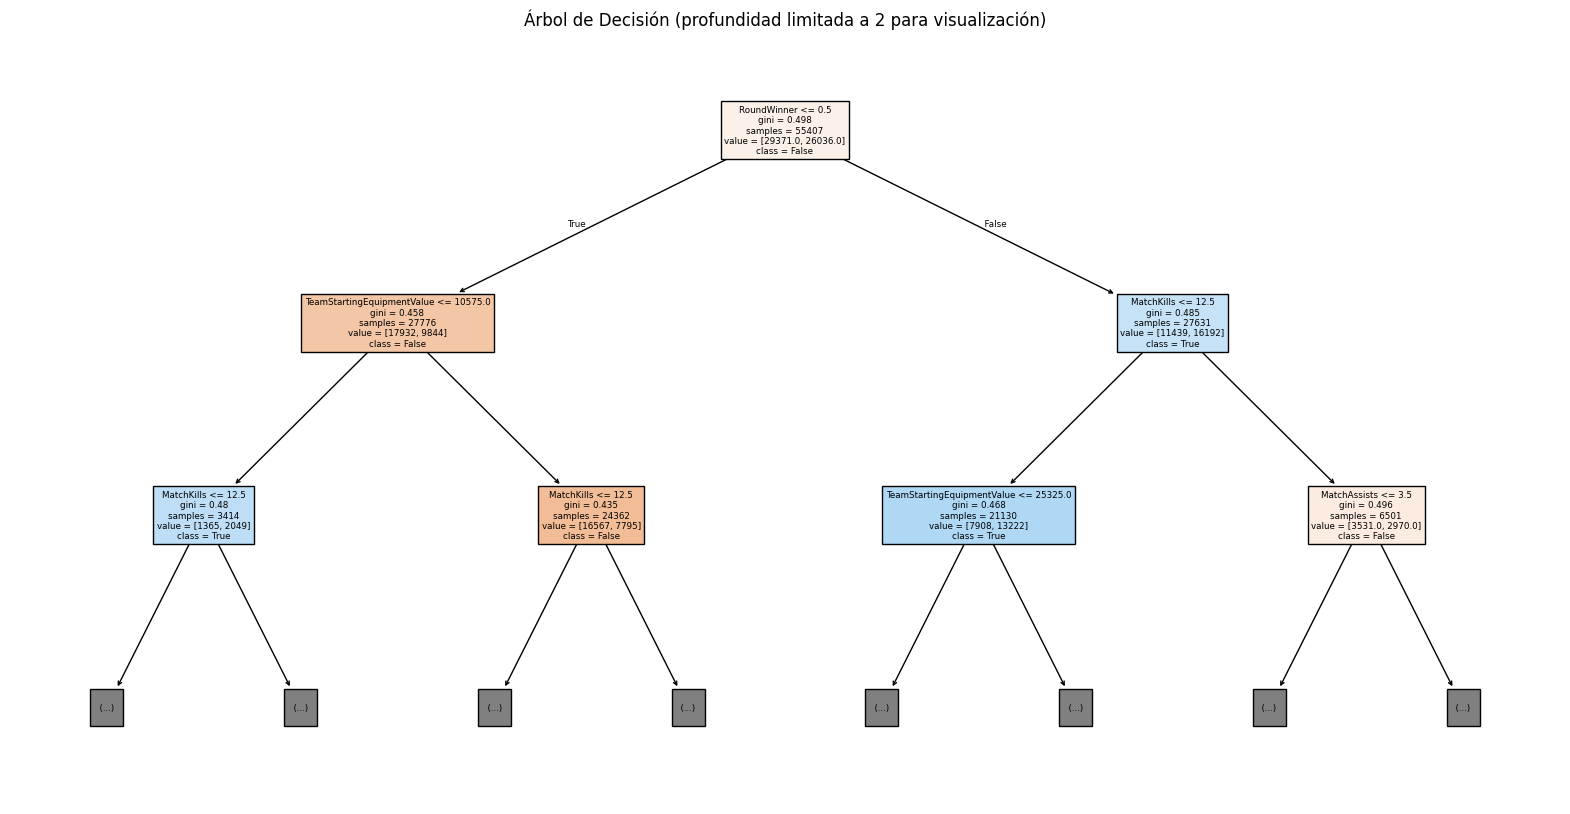

In [29]:
# Eliminar columnas irrelevantes manualmente
cols_a_eliminar = ['RoundId', 'MatchId', 'Tick', 'Index', 'DemoName', 'Frame']
df = df.drop(columns=cols_a_eliminar, errors='ignore')

# Separar variable objetivo
X = df.drop('MatchWinner', axis=1)
y = df['MatchWinner']

# Unir X e y antes del split para evitar desajustes
df_clean = pd.concat([X, y], axis=1)
df_clean = df_clean.dropna()
y = y.dropna()
X = X.loc[y.index]
y = y.astype(str)

# Identificar columnas categóricas
cat_cols = X.select_dtypes(include='object').columns

# Aplicar LabelEncoder a cada columna categórica
le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col].astype(str))


# Imputar valores faltantes en X
X = X.fillna(X.mean(numeric_only=True))


# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenamiento del modelo Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predicciones
y_pred = dt_model.predict(X_test)

# ROC-AUC si binaria
if len(dt_model.classes_) == 2:
    y_proba = dt_model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_proba)
    print(f"ROC AUC Score: {auc_score:.4f}")

# Average Precision Score
avg_precision_dt = average_precision_score(y_test, y_proba, pos_label='True')
print("Average Precision Score:", round(avg_precision_dt, 4))

# Reporte de clasificación
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sb.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Curva ROC AUC
RocCurveDisplay.from_predictions(y_test, y_proba, pos_label='True')
plt.title("Curva ROC - Decision Tree")
plt.grid()
plt.show()

# Arbol de decision
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=dt_model.classes_, filled=True, max_depth=2)
plt.title("Árbol de Decisión (profundidad limitada a 2 para visualización)")
plt.show()

# **Interpretación y conclusion acerca de los resultados obtenidos**
El modelo Decision Tree alcanzó un Average Precision Score de 0.6488, lo que refleja una precisión aceptable en la identificación del ganador de la ronda

El modelo obtuvo un accuracy de 75%, lo que significa que acertó en 3 de cada 4 partidas al predecir si un equipo ganaría o perdería la partida.

Esto se refleja también en la matriz de confusión, donde:

Predijo correctamente 9.596 veces que el equipo perdería y 8.174 veces que el equipo ganaría

Se equivocó 3.049 veces al predecir victoria cuando fue derrota y falló 2.928 veces al predecir derrota cuando fue victoria.

Además, el AUC (Área Bajo la Curva ROC) fue de 0.ROC AUC Score: 0.7365 y la visualización de la curva ROC confirma un AUC gráfico de aproximadamente 0.74, lo que sugiere que el modelo tiene una buena capacidad para distinguir entre una partida ganada y una perdida

El árbol de decisión construye una lógica coherente con el contexto del juego. Utiliza RoundWinner, TeamStartingEquipmentValue y MatchKills como principales predictores, lo que refleja que el modelo prioriza variables tácticas y de rendimiento real.

Esto demuestra que el modelo no solo es funcional, sino también interpretable, y puede ayudar a entender los factores más influyentes en el resultado de una partida.

El modelo tiene un comportamiento equilibrado entre ambas clases y mantiene un bajo nivel de errores críticos (falsos positivos/negativos), lo que lo hace confiable como predictor básico en contextos competitivos.